In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np


#在 Tensorflow 里定义一个添加层的函数可以很容易的添加神经层,为之后的添加省下不少时间.(这个在keras里直接自带的吧)
def add_layer(inputs, in_size, out_size, activation_function=None):   
    Weights = tf.Variable(tf.random_normal([in_size, out_size])) #随机初始化weight， weight是一个2维矩阵
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1) #初始bias最好不要为0，加上0.1给一个小偏移
    Wx_plus_b = tf.matmul(inputs, Weights) + biases #每一层的核心就是矩阵乘法
    
    if activation_function is None:
            outputs = Wx_plus_b
    else:
            outputs = activation_function(Wx_plus_b)
    return outputs #返回值是
            

In [2]:
#构造数据
x_data = np.linspace(-1,1,300, dtype=np.float32)[:, np.newaxis] 
noise = np.random.normal(0, 0.05, x_data.shape).astype(np.float32)
y_data = np.square(x_data) - 0.5 + noise #带有随机噪声

In [3]:
#nn的输入（输入层）
xs = tf.placeholder(tf.float32, [None, 1])#这里的None代表无论输入有多少都可以（什么意思？），因为输入只有一个特征，所以这里是1。 
ys = tf.placeholder(tf.float32, [None, 1])

In [4]:
#隐藏层 1*10
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)

#输出层 10*1
prediction = add_layer(l1, 10, 1, activation_function=None)

loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),
                     reduction_indices=[1])) #均方差

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

#上面这个

In [5]:
# init = tf.initialize_all_variables() # tf 马上就要废弃这种写法
init = tf.global_variables_initializer()  # 替换成这样就好
sess = tf.Session()
sess.run(init)

In [6]:
# for i in range(10000):
#     # training
#     sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
#     if i % 50 == 0:
#         # to see the step improvement
#         print(sess.run(loss, feed_dict={xs: x_data, ys: y_data}))

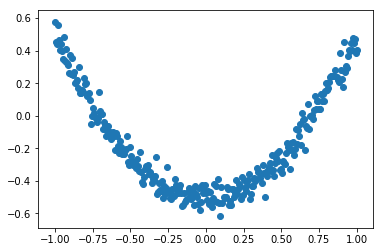

In [10]:
# 画出数据集
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.ion()#本次运行请注释，全局运行不要注释
plt.show()

In [16]:

for i in range(1000):
    # training
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
        # to visualize the result and improvement
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        prediction_value = sess.run(prediction, feed_dict={xs: x_data})
        # plot the prediction
        lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
        plt.pause(0.1)
ax.